<a target="_blank" rel="noopener noreferrer" href="https://colab.research.google.com/github/epacuit/introduction-machine-learning/blob/main/classification/beyond-linear-classification.ipynb">![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)</a>


(beyond-linear-classification)=
# Beyond Linear Classification


Linear classifiers, including Support Vector Machines (SVMs), face fundamental limitations when confronted with certain datasets. In this section, we demonstrate these limitations and show how neural networks provide an elegant solution.

We start with the classic XOR dataset as an example of a problem that is not linearly separable.

 
### The XOR Problem

The XOR (exclusive or) dataset is a standard example used to illustrate the limitations of linear classification. The XOR function is defined as:

$$
\text{XOR}(x_1, x_2) =
\begin{cases} 
1, & \text{if } x_1 \neq x_2 \\
0, & \text{if } x_1 = x_2
\end{cases}
$$

When plotted in a 2D space, the points corresponding to the XOR function cannot be separated by a single straight line (or hyperplane). Linear classifiers, including linear SVMs, create decision boundaries that are straight lines. Therefore, they cannot correctly classify the XOR dataset.

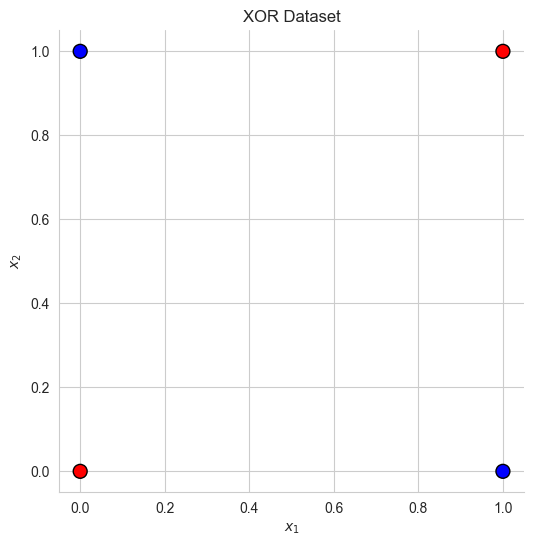

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")
# Define the XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([0, 1, 1, 0])

# Create colors for the two classes
colors = ['red' if label == 0 else 'blue' for label in y]

# Plot the XOR dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolor='k')
plt.title("XOR Dataset")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
sns.despine()
plt.show()


Linear classifiers attempt to find a boundary—such as a straight line or hyperplane—that separates classes. In the XOR case, no single straight line can separate the points where XOR is 1 from those where XOR is 0. Even if we stack multiple linear transformations, the resulting function remains linear:

$$
linear(linear(x)) = linear(x)
$$


In [2]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the XOR dataset
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
# XOR outputs: 0 if inputs are the same, 1 if they are different
y = np.array([-1, 1, 1, -1])

# Create a simple neural network with one hidden layer
model = Sequential([
    Input(shape=(2,)),          
    Dense(1, activation='linear'),  
    Dense(10, activation='linear'),  
    Dense(1, activation='linear') 
])

model.compile(loss='hinge', optimizer='sgd')

# Train the model
model.fit(X, y, epochs=1000, verbose=0)

# Evaluate the model on the XOR dataset
predictions = model.predict(X)
print("Predictions on the XOR dataset:")
print(predictions)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


Predictions on the XOR dataset:
[[ 0.        ]
 [-0.11990364]
 [-0.14784303]
 [-0.2677467 ]]


## Non-Linearity 

To classify datasets that are not linearly separable, neural networks introduce **non-linear activation functions**. By adding at least one hidden layer with a non-linear activation function, the network transforms the original input space into a new, intermediate representation.

This intermediate representation makes the XOR dataset linearly separable. Each neuron in the hidden layer learns to recognize specific patterns or clusters within the inputs, effectively reshaping the input data into a form that can be linearly separated by the output layer.


### Example:  XOR Classification

Consider a neural network with the following structure that can correctly classify the XOR dataset:

* **Input Layer**: Two neurons, receiving inputs $(x_1, x_2)$
* **Hidden Layer**: Two neurons, each with a non-linear activation function
* **Output Layer**: One neuron, producing the XOR classification result

Typically, the hidden neurons perform transformations such as:

* One hidden neuron might separate cases where exactly one input is '1', distinguishing $(0, 1)$ and $(1, 0)$ from the other two cases $(0, 0)$ and $(1, 1)$.
* The additional hidden neuron further enhances the network's ability to represent the data more clearly, simplifying the classification task for the output neuron.

As a result, the output neuron receives transformed inputs from the hidden layer that are now linearly separable, enabling correct classification of the XOR dataset, which is impossible with a single-layer network.


### Activation Functions


An **activation function** is a mathematical function applied to the output of a neuron (or node) in a neural network. Its primary purpose is to introduce non-linearity into the model, which allows the network to learn and represent complex patterns.  


After the neuron computes a weighted sum of its inputs, the activation function transforms this sum into the neuron's output. Mathematically, if the weighted sum is given by:

$$
z = W \cdot x + b,
$$

then the neuron's output is:
$$
a = \phi(z),
$$
where $\phi$ is the activation function.

Think of an activation function as a "decision maker" inside each brain cell (neuron) of our artificial brain (neural network). After a neuron collects information from other neurons, the activation function decides how strongly this neuron should "fire" or respond.  Without activation functions, our neural network would just be doing fancy math that can only draw straight lines through data. But real-world problems rarely fit straight lines!

### Common Activation Functions

#### Sigmoid: The "S-curve"

The sigmoid function transforms any input value into a number between 0 and 1, creating an S-shaped curve. This property makes it especially valuable for binary classification problems—situations where the network needs to decide between two options (like "spam or not spam").  Think of sigmoid outputs as confidence levels or probabilities:

* Values close to 1 mean "strongly yes"
* Values close to 0 mean "strongly no"
* Values around 0.5 indicate uncertainty

The sigmoid function is defined as:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

The benefits of the sigmoid function:

* **Makes Sense as Probability**: Outputs between 0 and 1 can be interpreted as "how likely" something is.
* **Smooth and Gradual**: The gentle S-curve helps the network make fine distinctions between values.
* **Mathematically Friendly**: Its derivative is easy to calculate, which makes training more efficient.

While useful, sigmoid has a key drawback: the vanishing gradient problem. For inputs with large absolute values (very positive or very negative), the function's slope becomes nearly flat. This means:

* Network training can slow down significantly
* Deep networks with many sigmoid layers may struggle to learn

This limitation explains why, despite its intuitive appeal, sigmoid is now primarily used in output layers for binary classification rather than throughout entire networks.


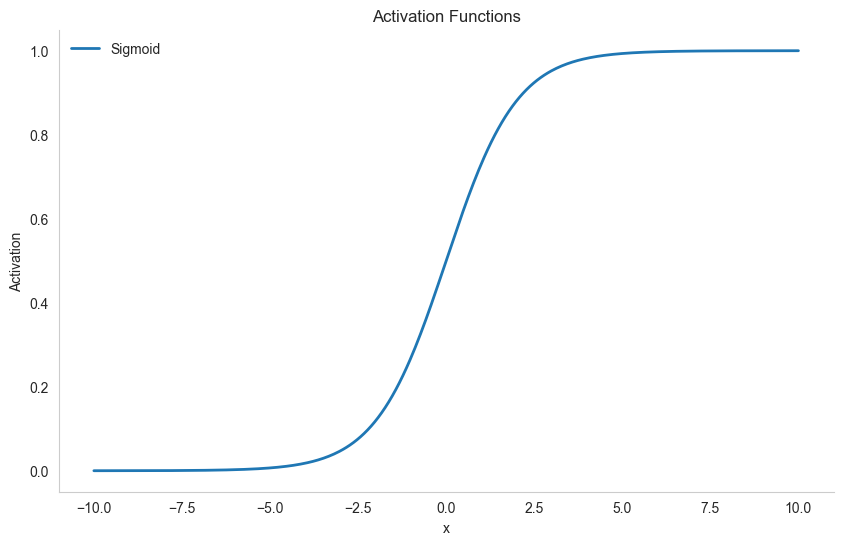

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate a range of input values
x = np.linspace(-10, 10, 400)

# Compute activation values for each function
y_sigmoid = sigmoid(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_sigmoid, label='Sigmoid', linewidth=2)

# Add labels and title
plt.xlabel('x')
plt.ylabel('Activation')
plt.title('Activation Functions')
plt.legend(frameon=False)
plt.grid(False)
sns.despine()
plt.show()


#### Tanh: The "Centered S-curve"


The hyperbolic tangent function ($tanh$) is a powerful activation function that produces values between $-1$ and $1$. While structurally similar to sigmoid, tanh's zero-centered output range offers significant advantages for neural network training.

The tanh function is defined as:
$$
  \tanh(z) = \frac{e^z - e^{-z}}{e^z + e^{-z}}
$$

The key benefits of tanh:

* **Zero-centered output**: Unlike sigmoid (which outputs 0 to 1), tanh is centered around zero (-1 to 1).
* **Steeper gradient**: The stronger slope helps networks learn faster in many situations.
* **Reduces bias**: Zero-centered outputs prevent systematic bias in the next layer's neurons.

When an activation function's outputs are centered around zero:

* The gradients are less likely to zigzag during training
* Weight updates become more efficient and direct
* The network can more easily learn both positive and negative correlations

For these reasons, tanh is often preferred over sigmoid for hidden layers in neural networks. However, tanh still suffers from the vanishing gradient problem at extreme values, just like sigmoid.

Think of tanh as an upgraded version of sigmoid that helps your network train more efficiently while maintaining the smooth, S-curve behavior that works well for many applications.


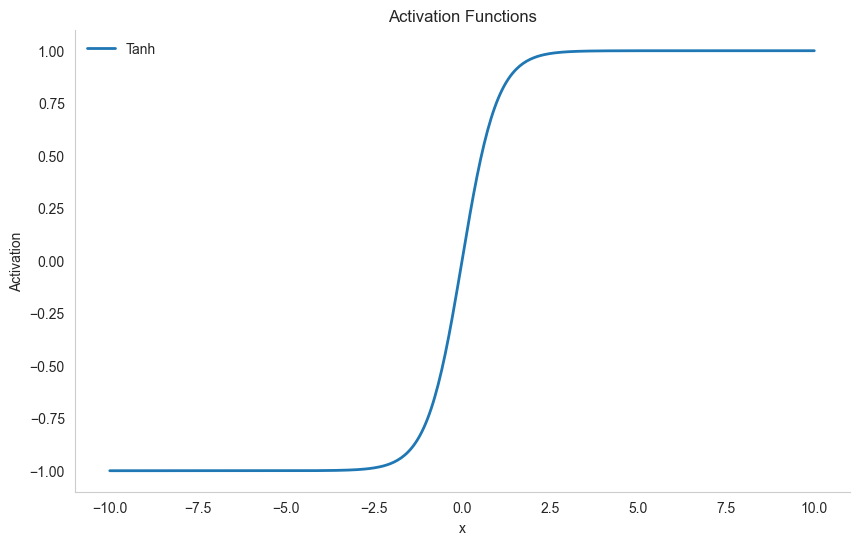

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# Generate a range of input values
x = np.linspace(-10, 10, 400)

# Compute activation values for each function
y_tanh = np.tanh(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_tanh, label='Tanh', linewidth=2)

# Add labels and title
plt.xlabel('x')
plt.ylabel('Activation')
plt.title('Activation Functions')
plt.legend(frameon=False)
plt.grid(False)
sns.despine()
plt.show()


#### ReLU: The "Keep it if it's positive"

The Rectified Linear Unit (ReLU) has become the most widely used activation function in modern neural networks. Its brilliance lies in its simplicity:

$$
\text{ReLU}(z) = \max(0, z)
$$

ReLU follows an incredibly straightforward rule:

* For positive inputs: "Pass them through unchanged"
* For negative inputs: "Convert them to zero"

This creates a hockey-stick shaped function that combines linear and non-linear properties. ReLU is computationally efficient, easy to optimize, and works well in practice. It has become the default choice for many types of neural networks.

ReLU's introduction helped enable deep networks with many layers that were previously difficult to train. It's a perfect example of how sometimes the simplest solutions work best in machine learning.

While ReLU has variants like Leaky ReLU to address its "dead neuron" problem (when neurons get stuck at 0), the original ReLU remains the default choice for most deep learning applications due to its balance of simplicity and effectiveness.


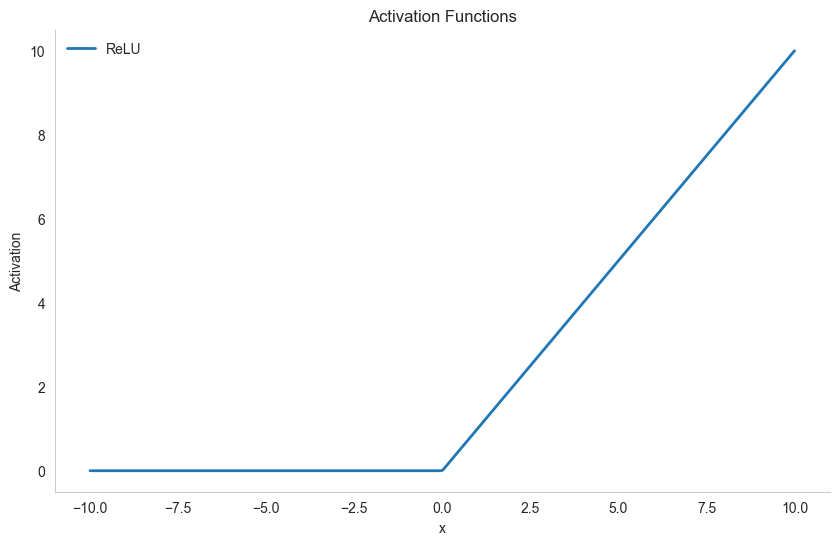

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

def relu(x):
    return np.maximum(0, x)

# Generate a range of input values
x = np.linspace(-10, 10, 400)

# Compute activation values for each function
y_relu = relu(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y_relu, label='ReLU', linewidth=2)

# Add labels and title
plt.xlabel('x')
plt.ylabel('Activation')
plt.title('Activation Functions')
plt.legend(frameon=False)
plt.grid(False)
sns.despine()
plt.show()


Try using different activation functions in the code below to see how they affect the decision boundary for the XOR dataset.

In [6]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD

# XOR dataset
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])

def train_xor(hidden_neurons, activation_fnc):
    model = Sequential([
        Input(shape=(2,)),  
        Dense(hidden_neurons,  activation=activation_fnc),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=SGD(learning_rate=0.1), loss='mse', metrics=['accuracy'])
    model.fit(X, y, epochs=2000, verbose=0)
    loss, acc = model.evaluate(X, y, verbose=0)
    print(f'Activation function {activation_fnc}, Hidden neurons: {hidden_neurons}, Accuracy: {acc:.2f}')
    predictions = model.predict(X)
    print(f'Predictions:\n{np.round(predictions, 2)}\n')

for activation_fnc in ['sigmoid', 'tanh', 'relu']:
    for neurons in [1, 2, 3]:
        train_xor(neurons, activation_fnc)


Activation function sigmoid, Hidden neurons: 1, Accuracy: 0.50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


Predictions:
[[0.51]
 [0.48]
 [0.52]
 [0.49]]



KeyboardInterrupt: 